In [27]:
import pandas as pd

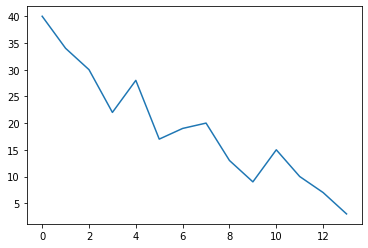

In [28]:
a = pd.Series([40,34,30,22,28,17,19,20,13,9,15,10,7,3])
a.plot()

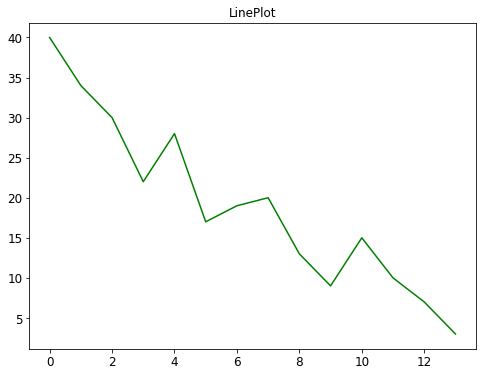

In [29]:
a.plot(figsize=(8,6), color='green', title='LinePlot', fontsize=12)

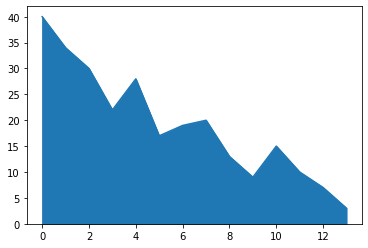

In [30]:
a.plot(kind='area')

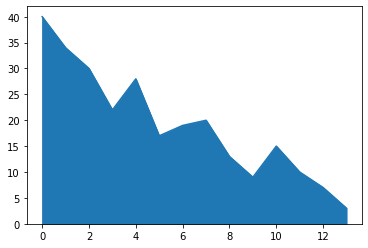

In [31]:
a.plot.area()

In [34]:
b=pd.Series([45,22,12,9,20,34,28,19,26,38,41,24,14,32])
c=pd.Series([25,38,33,38,23,12,30,37,34,22,16,24,12,9])

In [35]:
d=pd.DataFrame({'a': a, 'b': b, 'c': c})
d.head()

,a,b,c
0,40,45,25
1,34,22,38
2,30,12,33
3,22,9,38
4,28,20,23


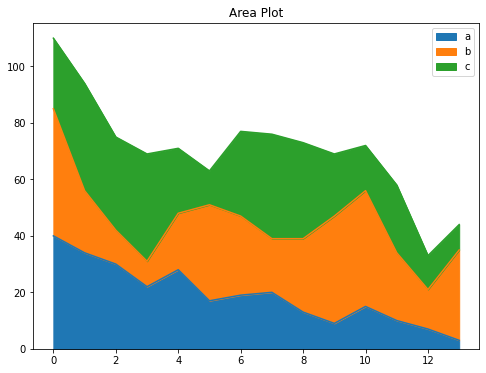

In [36]:
d.plot.area(figsize=(8,6), title='Area Plot')

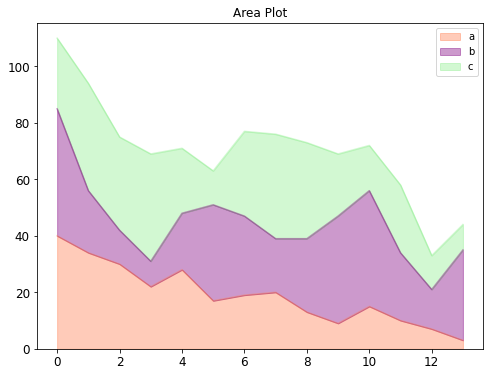

In [37]:
d.plot.area(alpha=0.4, color=['coral', 'purple', 'lightgreen'], figsize=(8,6), title='Area Plot', fontsize=12)
#alpha adds some translucent looks to the plot

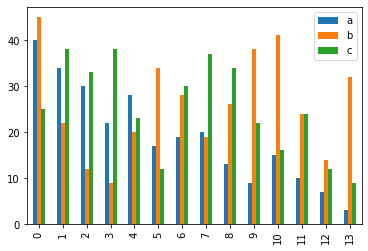

In [38]:
d.plot.bar()

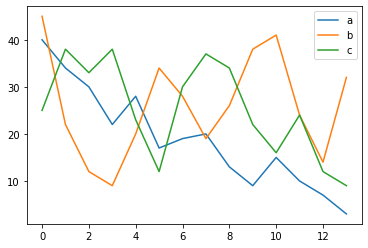

In [39]:
d.plot.line()

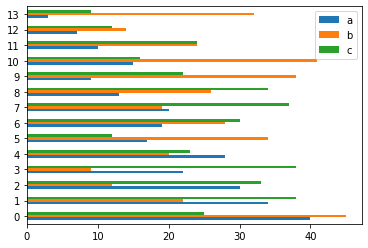

In [40]:
d.plot.barh()

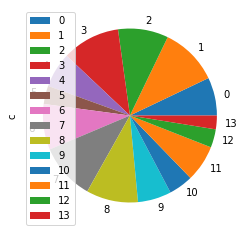

In [41]:
d.plot.pie(y='c')

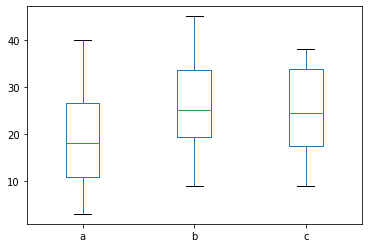

In [42]:
d.plot.box()

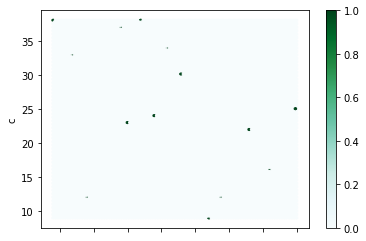

In [43]:
d.plot.hexbin(x='b', y='c')

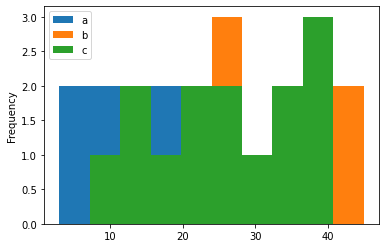

In [44]:
d.plot.hist()

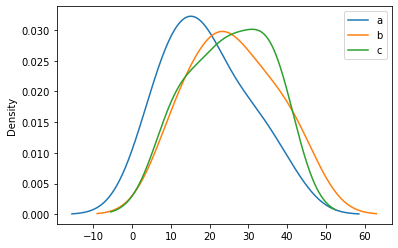

In [45]:
d.plot.kde()

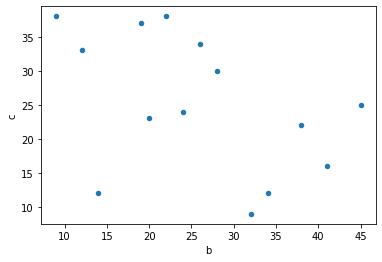

In [46]:
d.plot.scatter(x='b', y='c')

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
!ls '/content/drive'

'My Drive'


In [49]:
df = pd.read_csv('/content/drive/My Drive/Notebooks/Tricks_Python/Datasets/nhanes_2015_2016.csv')

In [50]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [51]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

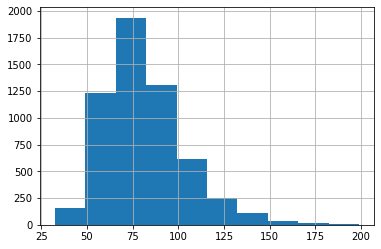

In [52]:
df['BMXWT'].hist()

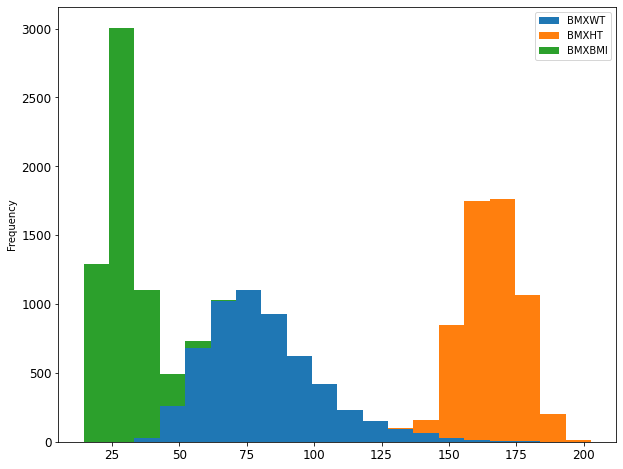

In [53]:
df[['BMXWT', 'BMXHT', 'BMXBMI']].plot.hist(stacked=True, bins=20, fontsize=12, figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae0a72d438>,
      dtype=object)

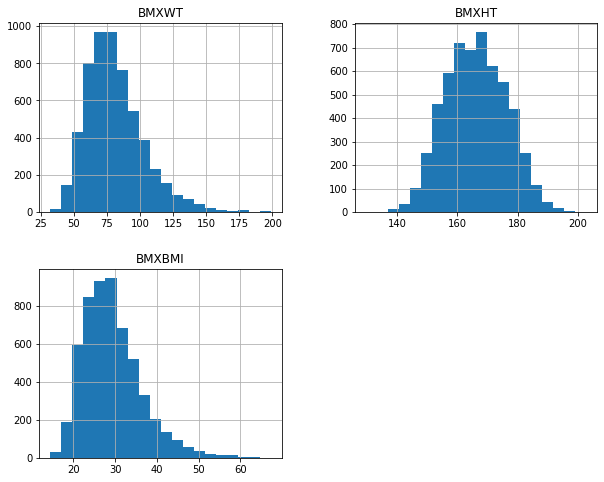

In [54]:
df[['BMXWT', 'BMXHT', 'BMXBMI']].hist(bins=20, figsize=(10,8))

In [55]:
df['DMDEDUC2x'] = df.DMDEDUC2.replace({1: 'less than 9', 2: '9-11', 3: 'HS/GED', 4: 'Some college/AA', 5: 'College', 7: 'Refused', 9: "Don't know"})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae0a6272e8>,
      dtype=object)

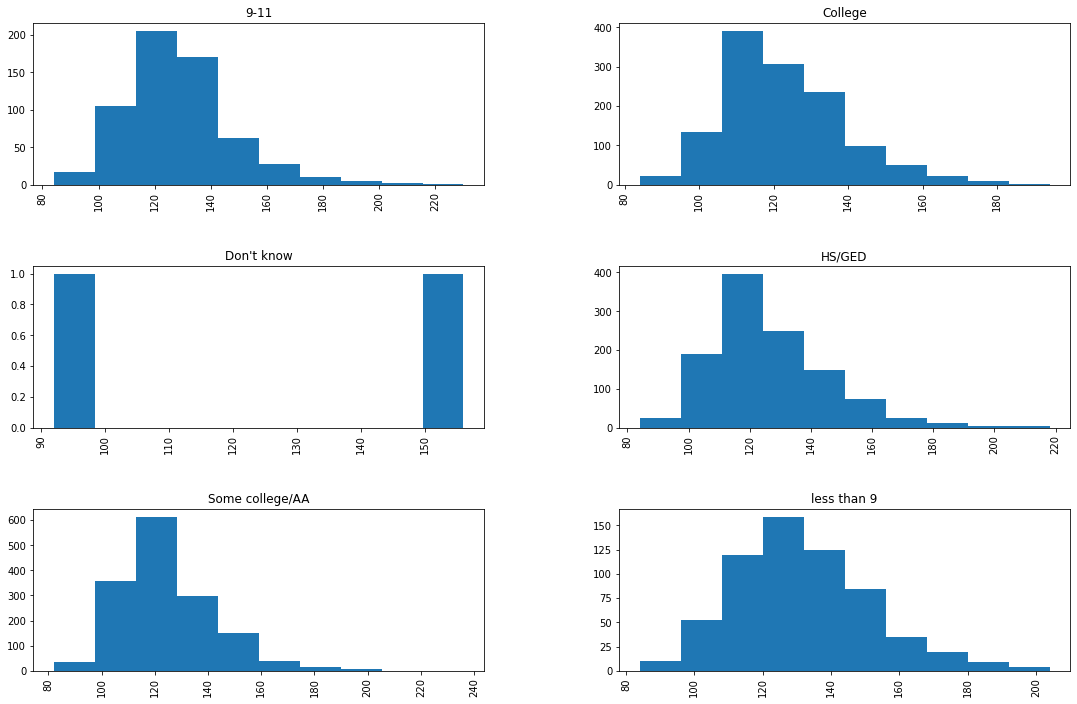

In [56]:
df[['DMDEDUC2x', 'BPXSY1']].hist(by='DMDEDUC2x', figsize=(18,12))

In [57]:
df['DMDMARTLx'] = df.DMDMARTL.replace({1: 'Married', 2: 'Widowed', 3: 'Divorced', 4: 'Separated', 5: 'Never married', 6: 'Living w/ partner', 77: 'Refused'})

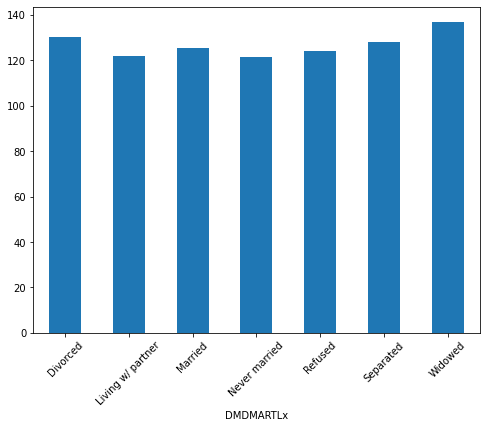

In [58]:
df.groupby('DMDMARTLx')['BPXSY1'].mean().plot(kind='bar', rot=45, fontsize=10, figsize=(8,6))

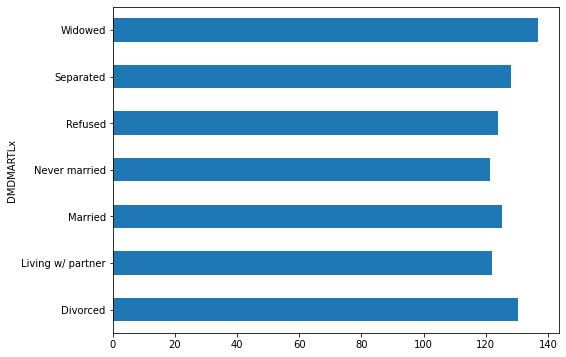

In [59]:
df.groupby('DMDMARTLx')['BPXSY1'].mean().plot(kind='barh', fontsize=10, figsize=(8,6))

In [60]:
df_bmx = df.groupby('RIDRETH1')['BMXWT', 'BMXHT', 'BMXBMI'].mean().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


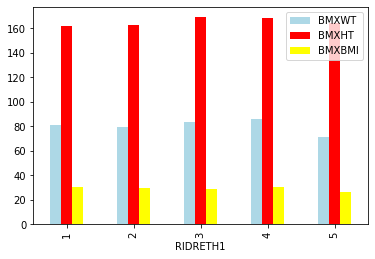

In [61]:
df_bmx.plot(x='RIDRETH1',
            y=['BMXWT', 'BMXHT', 'BMXBMI'],
            kind='bar',
            color=['lightblue', 'red', 'yellow'],
            fontsize=10)

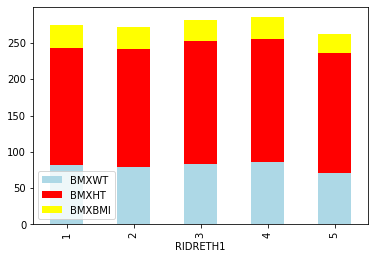

In [62]:
df_bmx.plot(x='RIDRETH1',
            y=['BMXWT', 'BMXHT', 'BMXBMI'],
            kind='bar',
            stacked=True,
            color=['lightblue', 'red', 'yellow'],
            fontsize=10)

In [63]:
df_edu_marit = df.groupby('DMDEDUC2x')['DMDMARTL'].count()
pd.Series(df_edu_marit)

DMDEDUC2x
9-11                643
College            1366
Don't know            3
HS/GED             1186
Some college/AA    1621
less than 9         655
Name: DMDMARTL, dtype: int64

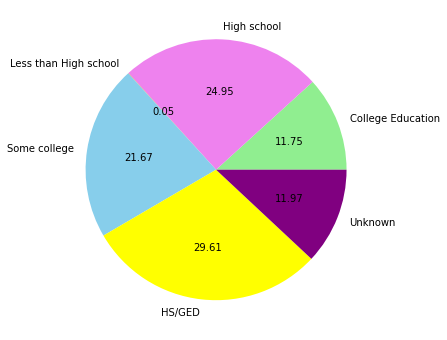

In [64]:
ax = pd.Series(df_edu_marit).plot.pie(subplots=True,
                                      label='',
                                      labels=['College Education', 'High school', 'Less than High school', 'Some college', 'HS/GED', 'Unknown'],
                                      figsize=(8,6),
                                      colors=['lightgreen', 'violet', 'coral', 'skyblue', 'yellow', 'purple'],
                                      autopct='%.2f')

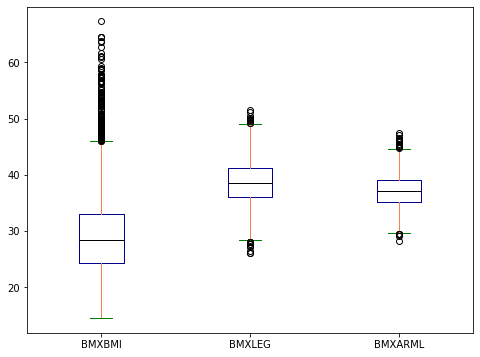

In [65]:
color = {'boxes': 'Darkblue', 'whiskers': 'coral', 'medians': 'Black', 'caps': 'Green'}
df[['BMXBMI', 'BMXLEG', 'BMXARML']].plot.box(figsize=(8,6), color=color)

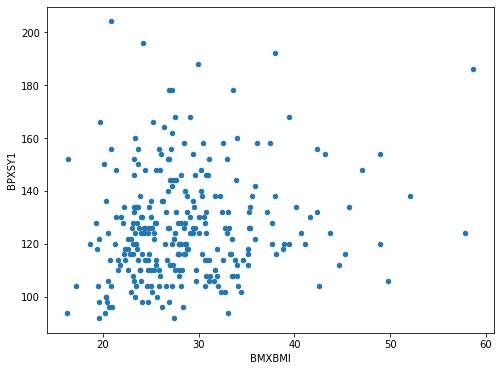

In [66]:
df.head(300).plot(x='BMXBMI', y='BPXSY1', kind='scatter', figsize=(8,6))

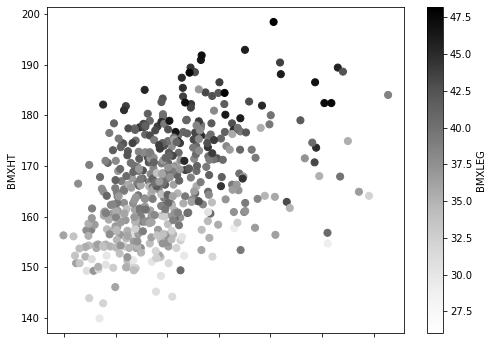

In [67]:
df.head(500).plot.scatter(x='BMXWT', y='BMXHT', c='BMXLEG', s=50, figsize=(8,6))

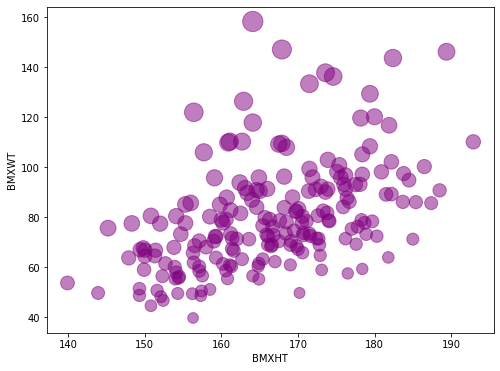

In [68]:
df.head(200).plot.scatter(x='BMXHT', y='BMXWT', s=df['BMXBMI'][:200]*7, alpha=0.5, color='purple', figsize=(8,6))

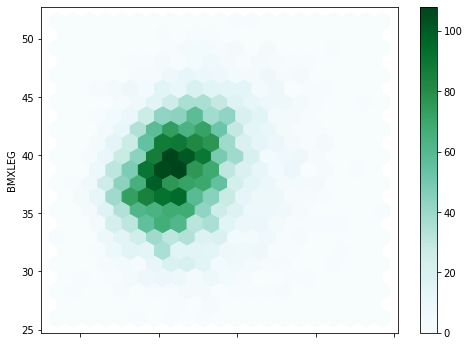

In [70]:
df.plot.hexbin(x='BMXARMC', y='BMXLEG', gridsize=20, figsize=(8,6))

In [75]:
import numpy as np

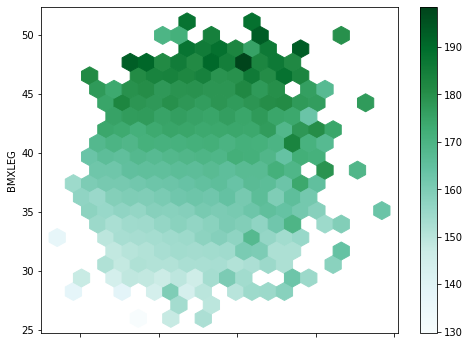

In [76]:
df.plot.hexbin(x='BMXARMC', 
               y='BMXLEG', 
               C='BMXHT',
               reduce_C_function=np.mean,
               gridsize=20, 
               figsize=(8,6))


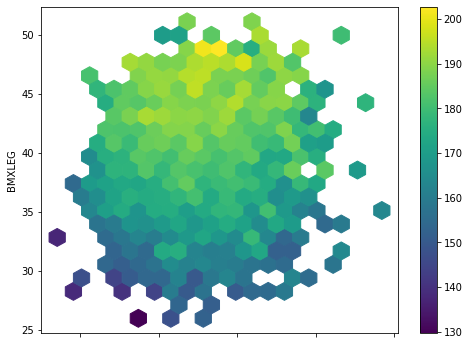

In [77]:
df.plot.hexbin(x='BMXARMC', 
               y='BMXLEG', 
               C='BMXHT',
               reduce_C_function=np.max,
               gridsize=20, 
               figsize=(8,6),
               cmap='viridis')


In [78]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae07ec57f0>,
      dtype=object)

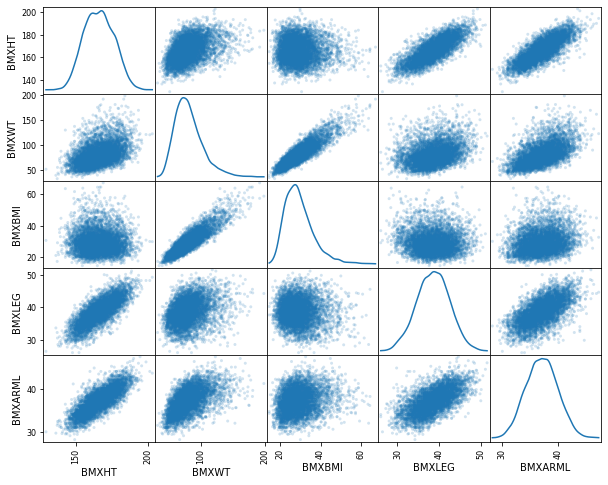

In [79]:
scatter_matrix(df[['BMXHT','BMXWT', 'BMXBMI', 'BMXLEG', 'BMXARML']], alpha=0.2, figsize=(10,8), diagonal='kde')

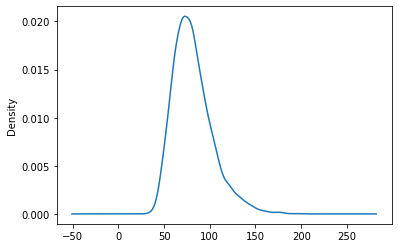

In [80]:
df['BMXWT'].plot.kde()

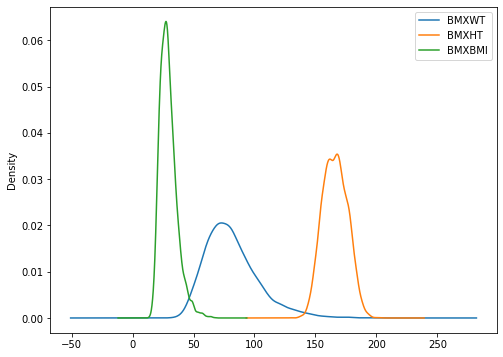

In [81]:
df[['BMXWT', 'BMXHT', 'BMXBMI']].plot.kde(figsize=(8,6))

In [82]:
from pandas.plotting import parallel_coordinates

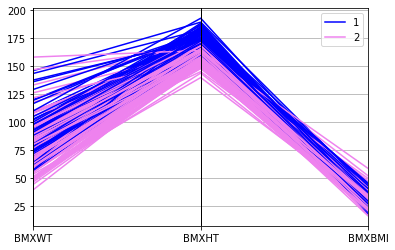

In [83]:
parallel_coordinates(df[['BMXWT', 'BMXHT', 'BMXBMI', 'RIAGENDR']].dropna().head(200), 'RIAGENDR', color=['blue', 'violet'])

In [84]:
from pandas.plotting import bootstrap_plot

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


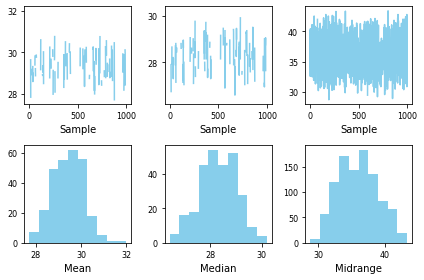

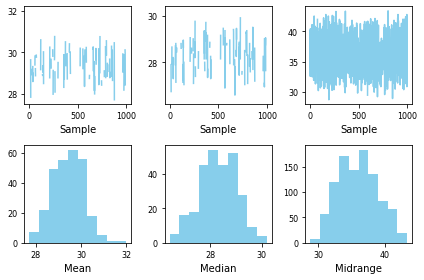

In [87]:
bootstrap_plot(df['BMXBMI'], size=100, samples=1000, color='skyblue')